Import Required Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt


Create and View the Dataset

In [2]:
# Simulated dataset: disease susceptibility
data = {
    'age': [25, 45, 35, 50, 23, 40, 60, 30, 27, 55],
    'bmi': [22.5, 30.2, 28.5, 32.1, 20.3, 27.6, 35.4, 25.1, 21.4, 31.8],
    'glucose': [90, 150, 140, 170, 85, 130, 180, 110, 95, 160],
    'disease': [0, 1, 1, 1, 0, 1, 1, 0, 0, 1]  # 1 = susceptible, 0 = not susceptible
}

df = pd.DataFrame(data)
print(df.shape)
print(df.head())


(10, 4)
   age   bmi  glucose  disease
0   25  22.5       90        0
1   45  30.2      150        1
2   35  28.5      140        1
3   50  32.1      170        1
4   23  20.3       85        0


 Check for Missing Values

In [3]:
print(df.isnull().sum())


age        0
bmi        0
glucose    0
disease    0
dtype: int64


Define Feature Columns and Target

In [4]:
feature_cols = ['age', 'bmi', 'glucose']
X = df[feature_cols]
y = df['disease']


Split the Dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(8, 3) (8,) (2, 3) (2,)


Fit Logistic Regression Model

In [6]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Evaluate the Model

In [7]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

acc_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc_score)
print("Accuracy Percentage:", int(acc_score * 100), "%")


Confusion Matrix:
 [[2]]
Accuracy Score: 1.0
Accuracy Percentage: 100 %


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Plot Confusion Matrix Heatmap

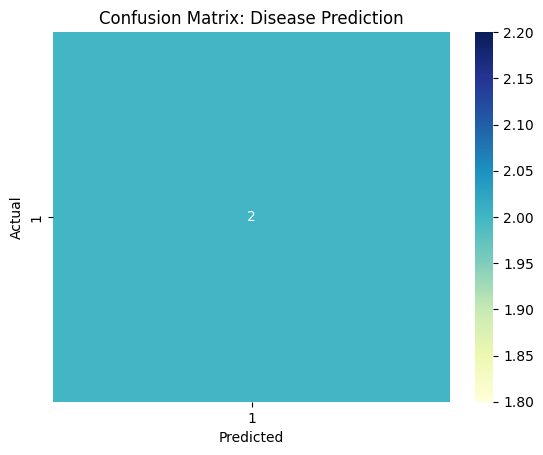

In [8]:
conf_df = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_df, annot=True, cmap='YlGnBu')
plt.title("Confusion Matrix: Disease Prediction")
plt.show()
